# Getting more data to balance classes

* We will work on a small sample of Amazon Bin Images, which is provided by Amazon in (file_list.json), This subset of data has 5 classes, corresponding to a number of objects present in each bin: 1, 2, 3, 4 & 5. The total number of images in this subset is 10,441. But we have an unbalanced data issue, thus we will get more data from the original file that contains 500,0000 images, and to avoid downloading an existing image we will compare the downloaded image metadata with the subset data in (file_list.json).

# Table of contents:
<ul>
<li><a href="#getting data">Getting Data</a></li>
<li><a href="#splitting"> Splitting Data</a></li>      
<li><a href="#s3"> Uploading the data to S3 Bucket </a></li>               
</ul>

<a id='getting data'></a>
# Getting Data

In [1]:
import os
import json
import boto3
from tqdm import tqdm
import numpy as np
s3_client = boto3.client('s3')
import shutil

In [4]:
#TODO: Perform any data cleaning or data preprocessing

with open('file_list.json', 'r') as f:
    
     d=json.load(f)

In [4]:
for c in d.keys():
    print(f"Number of images in class {c} is: {len(d[c])} ")

Number of images in class 1 is: 1228 
Number of images in class 2 is: 2299 
Number of images in class 3 is: 2666 
Number of images in class 4 is: 2373 
Number of images in class 5 is: 1875 


In [1]:
# Number of needed images for each class
class1_threshold=2666-1228
class2_threshold=2666-2299
class4_threshold=2666-2373
class5_threshold=2666-1875
class1_threshold,class2_threshold,class4_threshold,class5_threshold

(1438, 367, 293, 791)

In [2]:
class1_threshold+class2_threshold+class4_threshold+class5_threshold

2889

In [5]:
d.keys()

dict_keys(['1', '2', '3', '4', '5'])

In [14]:
json_directory=os.path.join('new_jsonfiles')
classes=set([1,2,4,5])
for i in range(105276, 110000):
    
    if((i%1000)==0):
        print(i)
        print(classes)
        print("Class 1 left:", class1_threshold)
        print("Class 2 left:", class2_threshold)
        print("Class 4 left:", class4_threshold)
        print("Class 5 left:", class5_threshold)
    
    to_check = 'data/metadata/' + str(i) + '.json'
    if to_check in d.keys():
        #print("Have already: ",to_check)
        continue
    else:
        s3_path = to_check[5:]
        #print(s3_path)
        file_name = str(i) + '.json'
        s3_client.download_file('aft-vbi-pds', s3_path,
                             os.path.join(json_directory, file_name))
        with open(os.path.join(json_directory, file_name), 'r') as f:
                            d_temp=json.load(f)
        if d_temp["EXPECTED_QUANTITY"] not in classes:
            print(d_temp["EXPECTED_QUANTITY"])
            continue
        else:
            qty = d_temp["EXPECTED_QUANTITY"]
            print("FOUND: ", qty)
            if(qty==1):
                class1_threshold-=1
                if(class1_threshold == 0):
                    classes.remove(1)
            elif(qty==2):
                class2_threshold-=1
                if(class2_threshold == 0):
                    classes.remove(2)
            elif(qty==4):
                class4_threshold-=1
                if(class4_threshold == 0):
                    classes.remove(4)
            else:
                class5_threshold-=1
                if(class5_threshold == 0):
                    classes.remove(5)
                    
            image_name = str(i) + '.jpg'
            down_directory = os.path.join('new_data', str(d_temp["EXPECTED_QUANTITY"]))
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', image_name),
                             os.path.join(down_directory, image_name))
            
            if(class1_threshold ==0 and class2_threshold==0 and class4_threshold==0 and class5_threshold==0):
                print("ALL DONE")
                break
            

FOUND:  5
FOUND:  2
FOUND:  1
3
FOUND:  4
FOUND:  4
FOUND:  2
FOUND:  4
FOUND:  1
FOUND:  4
8
7
6
FOUND:  4
FOUND:  2
3
FOUND:  2
3
FOUND:  4
8
7
FOUND:  4
FOUND:  4
FOUND:  2
6
FOUND:  2
6
3
11
FOUND:  4
3
FOUND:  2
9
8
7
3
FOUND:  2
FOUND:  5
FOUND:  5
FOUND:  4
12
10
6
8
3
7
9
7
FOUND:  4
FOUND:  1
FOUND:  2
FOUND:  4
3
6
FOUND:  5
7
6
7
FOUND:  1
3
7
FOUND:  2
FOUND:  1
3
9
FOUND:  2
3
FOUND:  2
FOUND:  4
FOUND:  2
3
FOUND:  2
FOUND:  4
3
3
7
FOUND:  5
FOUND:  4
FOUND:  4
FOUND:  5
FOUND:  2
0
0
6
6
FOUND:  5
9
3
6
FOUND:  5
13
11
FOUND:  5
3
3
FOUND:  5
8
11
FOUND:  1
0
7
FOUND:  1
3
3
FOUND:  4
7
6
FOUND:  5
3
FOUND:  2
6
FOUND:  5
FOUND:  2
3
FOUND:  2
3
FOUND:  2
6
9
10
6
FOUND:  5
15
17
7
6
FOUND:  5
FOUND:  4
6
FOUND:  5
21
FOUND:  4
3
9
8
12
11
FOUND:  4
FOUND:  5
FOUND:  4
FOUND:  4
3
3
FOUND:  5
8
7
13
6
FOUND:  1
3
3
FOUND:  4
FOUND:  4
6
FOUND:  5
7
7
FOUND:  5
7
10
3
FOUND:  1
10
8
10
9
FOUND:  2
3
FOUND:  4
FOUND:  2
FOUND:  4
FOUND:  2
3
FOUND:  4
3
FOUND:  2
FOUND:  

In [6]:
rootdir = "new_data/"

for subdir, dirs, files in os.walk(rootdir):
    for dr in dirs:
            
        
        lst = os.listdir(os.path.join(subdir, dr))
        print(f"Count of images in class {dr}: {len(lst)}")


Count of images in class 1: 354
Count of images in class 2: 367
Count of images in class 4: 293
Count of images in class .ipynb_checkpoints: 0
Count of images in class 5: 527


In [61]:
class1_threshold,class2_threshold,class4_threshold,class5_threshold

(1084, 0, 0, 263)

### We still haven't much data for class 1 and 5

In [110]:
with open('file_list.json', 'r') as f:
    
     d=json.load(f)

In [4]:
# I will try to get more data for class 1 
class1_threshold=572
json_directory=os.path.join('new_jsonfiles2')
classes=set([1])
for i in range(110000,115000):
    
    if((i%1000)==0):
        print(i)
        print(classes)
        print("Class 1 left:", class1_threshold)
       
    
    to_check = 'data/metadata/' + str(i) + '.json'
    if to_check in d.keys():
        #print("Have already: ",to_check)
        continue
    else:
        s3_path = to_check[5:]
        #print(s3_path)
        file_name = str(i) + '.json'
        s3_client.download_file('aft-vbi-pds', s3_path,
                             os.path.join(json_directory, file_name))
        with open(os.path.join(json_directory, file_name), 'r') as f:
                            d_temp=json.load(f)
        if d_temp["EXPECTED_QUANTITY"] not in classes:
            print(d_temp["EXPECTED_QUANTITY"])
            continue
        else:
            qty = d_temp["EXPECTED_QUANTITY"]
            print("FOUND: ", qty)
            if(qty==1):
                class1_threshold-=1
                if(class1_threshold == 0):
                    classes.remove(1)
                    
            image_name = str(i) + '.jpg'
            down_directory = os.path.join('new_data', str(d_temp["EXPECTED_QUANTITY"]))
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', image_name),
                             os.path.join(down_directory, image_name))
            
            if(class1_threshold ==0):
                print("ALL DONE")
                break
            

110000
{1}
Class 1 left: 572
FOUND:  1
FOUND:  1
7
6
21
20
8
7
FOUND:  1
2
3
4
5
6
2
6
5
5
4
4
3
4
3
4
4
3
12
7
6
7
6
2
FOUND:  1
5
4
4
3
8
10
2
3
12
2
5
4
3
17
16
3
2
13
5
6
5
8
7
3
6
3
6
3
5
7
6
4
6
7
5
4
3
3
2
2
FOUND:  1
9
8
9
9
5
4
15
FOUND:  1
6
5
6
5
6
5
17
10
8
8
6
8
7
4
2
3
3
2
4
5
19
18
7
6
0
27
10
15
3
4
9
8
FOUND:  1
3
3
2
FOUND:  1
6
20
19
4
3
4
3
17
5
FOUND:  1
3
5
FOUND:  1
2
FOUND:  1
0
2
FOUND:  1
2
FOUND:  1
5
3
0
4
5
4
FOUND:  1
4
6
4
3
3
4
2
9
5
5
9
7
6
5
7
4
5
9
3
3
4
2
FOUND:  1
3
5
4
FOUND:  1
2
10
9
8
2
5
9
10
2
3
FOUND:  1
FOUND:  1
8
7
6
8
7
3
4
4
11
10
7
3
4
3
4
3
4
3
6
5
4
2
3
4
2
5
5
8
3
10
3
9
8
15
3
2
3
5
14
11
2
3
4
3
3
7
9
2
0
FOUND:  1
4
5
4
3
3
FOUND:  1
7
6
3
12
17
16
5
5
FOUND:  1
3
11
3
6
2
10
2
9
5
8
6
2
FOUND:  1
3
4
FOUND:  1
4
3
2
2
5
4
6
5
7
9
4
6
5
9
FOUND:  1
2
2
4
3
2
4
3
3
2
3
2
FOUND:  1
0
FOUND:  1
11
12
FOUND:  1
0
2
6
5
4
3
2
11
10
5
4
9
4
FOUND:  1
3
11
8
0
3
2
8
4
3
2
FOUND:  1
0
4
3
6
3
2
4
3
8
5
2
FOUND:  1
3
FOUND:  1
5
8
4
19
20


In [6]:
len(os.listdir("new_data/1")) #still I need more data at least 460 images

742

* It seems that the number of samples of class one are rare in the whole data 

In [8]:
class1_threshold=470
json_directory=os.path.join('new_jsonfiles2')
classes=set([1])
for i in range(115000,120000):
    
    if((i%1000)==0):
        print(i)
        print(classes)
        print("Class 1 left:", class1_threshold)
       
    
    to_check = 'data/metadata/' + str(i) + '.json'
    if to_check in d.keys():
        #print("Have already: ",to_check)
        continue
    else:
        s3_path = to_check[5:]
        #print(s3_path)
        file_name = str(i) + '.json'
        s3_client.download_file('aft-vbi-pds', s3_path,
                             os.path.join(json_directory, file_name))
        with open(os.path.join(json_directory, file_name), 'r') as f:
                            d_temp=json.load(f)
        if d_temp["EXPECTED_QUANTITY"] not in classes:
            print(d_temp["EXPECTED_QUANTITY"])
            continue
        else:
            qty = d_temp["EXPECTED_QUANTITY"]
            print("FOUND: ", qty)
            if(qty==1):
                class1_threshold-=1
                if(class1_threshold == 0):
                    classes.remove(1)
                    
            image_name = str(i) + '.jpg'
            down_directory = os.path.join('new_data', str(d_temp["EXPECTED_QUANTITY"]))
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', image_name),
                             os.path.join(down_directory, image_name))
            
            if(class1_threshold ==0):
                print("ALL DONE")
                break
            

115000
{1}
Class 1 left: 470
FOUND:  1
0
5
3
FOUND:  1
9
10
4
3
5
6
9
10
4
3
2
FOUND:  1
19
20
5
0
2
2
FOUND:  1
2
10
2
FOUND:  1
3
2
FOUND:  1
2
FOUND:  1
6
FOUND:  1
3
5
4
2
3
4
10
9
2
4
2
5
4
11
9
3
4
6
7
8
7
2
3
FOUND:  1
2
4
6
8
7
5
4
18
16
0
FOUND:  1
5
3
11
3
2
FOUND:  1
8
7
3
7
FOUND:  1
0
5
9
7
5
FOUND:  1
2
6
8
4
9
2
8
2
4
3
8
2
6
5
3
4
6
4
5
7
9
12
11
3
7
5
7
2
FOUND:  1
5
3
11
10
4
5
41
40
2
8
7
16
4
5
2
FOUND:  1
10
9
6
7
8
FOUND:  1
10
8
7
FOUND:  1
3
2
10
7
6
3
4
2
4
2
4
3
4
5
11
FOUND:  1
6
2
4
5
FOUND:  1
FOUND:  1
2
2
FOUND:  1
5
4
FOUND:  1
6
5
8
3
27
26
2
10
9
3
5
4
5
4
8
9
3
3
5
2
3
3
4
3
3
2
8
7
7
8
5
4
2
2
4
6
10
9
8
5
7
6
4
9
8
FOUND:  1
0
3
2
9
3
2
4
3
4
5
6
6
5
3
4
4
3
7
6
5
5
6
7
5
4
3
2
5
6
5
4
7
4
6
5
4
3
3
FOUND:  1
2
6
5
3
FOUND:  1
7
4
5
2
3
3
2
2
3
4
4
3
FOUND:  1
4
FOUND:  1
3
2
4
2
4
3
FOUND:  1
2
7
5
6
4
12
14
FOUND:  1
5
2
FOUND:  1
3
5
2
9
8
15
14
2
2
3
4
2
8
5
4
3
FOUND:  1
0
7
8
7
FOUND:  1
2
4
3
2
6
2
5
4
2
5
7
5
FOUND:  1
5
17
16
13
12
2
3
4
2


In [9]:
len(os.listdir("new_data/1"))

1122

In [10]:
1122-572

550

In [11]:
class1_threshold=150
class5_threshold=270 #I forgot to get the rest of needed data for class5
json_directory=os.path.join('new_jsonfiles2')
classes=set([1,5])
for i in range(120000,125000):
    
    if((i%1000)==0):
        print(i)
        print(classes)
        print("Class 1 left:", class1_threshold)
        print("Class 5 left:", class5_threshold)
       
    
    to_check = 'data/metadata/' + str(i) + '.json'
    if to_check in d.keys():
        #print("Have already: ",to_check)
        continue
    else:
        s3_path = to_check[5:]
        #print(s3_path)
        file_name = str(i) + '.json'
        s3_client.download_file('aft-vbi-pds', s3_path,
                             os.path.join(json_directory, file_name))
        with open(os.path.join(json_directory, file_name), 'r') as f:
                            d_temp=json.load(f)
        if d_temp["EXPECTED_QUANTITY"] not in classes:
            print(d_temp["EXPECTED_QUANTITY"])
            continue
        else:
            qty = d_temp["EXPECTED_QUANTITY"]
            print("FOUND: ", qty)
            if(qty==1):
                class1_threshold-=1
                if(class1_threshold == 0):
                    classes.remove(1)
            elif(qty==5):
                class5_threshold-=1
                if(class5_threshold == 0):
                    classes.remove(5)        
            image_name = str(i) + '.jpg'
            down_directory = os.path.join('new_data', str(d_temp["EXPECTED_QUANTITY"]))
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', image_name),
                             os.path.join(down_directory, image_name))
            
            if(class1_threshold ==0 and class5_threshold ==0):
                print("ALL DONE")
                break
            

120000
{1, 5}
Class 1 left: 150
Class 5 left: 270
FOUND:  1
7
8
6
2
3
3
4
2
4
4
19
18
3
6
FOUND:  5
4
FOUND:  5
7
18
20
6
FOUND:  5
2
FOUND:  1
4
2
3
2
FOUND:  1
3
FOUND:  1
2
3
6
FOUND:  5
4
3
8
7
FOUND:  1
2
4
3
6
FOUND:  5
4
8
4
3
FOUND:  1
9
FOUND:  5
0
24
7
6
3
FOUND:  5
6
FOUND:  1
6
FOUND:  5
FOUND:  5
4
3
2
3
3
2
FOUND:  1
4
3
9
8
7
4
3
7
8
8
10
FOUND:  5
3
3
9
8
FOUND:  5
4
15
10
9
10
18
17
7
6
3
6
FOUND:  5
7
9
6
10
3
3
4
8
7
11
8
4
0
3
4
13
10
FOUND:  5
4
FOUND:  5
4
2
2
3
3
7
FOUND:  5
2
3
2
4
FOUND:  5
FOUND:  5
4
FOUND:  5
3
9
8
10
9
0
3
7
8
FOUND:  1
2
3
FOUND:  5
7
FOUND:  1
3
4
7
8
7
2
4
4
3
7
6
3
2
3
4
3
25
24
23
0
FOUND:  1
2
FOUND:  5
2
FOUND:  1
4
6
FOUND:  5
FOUND:  5
3
3
4
4
0
FOUND:  5
FOUND:  5
4
6
3
4
4
3
6
FOUND:  5
7
6
7
6
3
2
FOUND:  5
4
3
6
FOUND:  5
FOUND:  5
10
3
FOUND:  5
4
4
6
FOUND:  5
FOUND:  1
8
FOUND:  5
7
12
11
7
6
3
2
FOUND:  1
FOUND:  1
10
4
3
2
4
7
FOUND:  5
8
7
6
FOUND:  5
8
3
4
9
7
11
10
0
2
12
11
9
6
2
4
2
8
19
2
3
8
2
FOUND:  5
4
6
3
2
3
2


In [12]:
len(os.listdir("new_data/1")) , len(os.listdir("new_data/5"))

(1272, 821)

In [18]:
print(f"Count of all images: {1272+367+293+ 821 + sum(count_of_classes)}")

Count of all images: 13194


<a id='splitting'></a>
# Data Splitting

## Split the avalible data to train, valid and test

* Total samples of training data:10000 samples, 2000 samples for each class
* Total samples of testing data: 1597 samples, 319 samples for each class
* Total samples of  validation data: 1597 samples, 319 samples for each class

In [26]:
(10000/13194)*100 ,(13194-10000) # 75% of the data for training

(75.79202667879339, 3194)

In [27]:
10000//5 #1796 samples for each class  

2000

In [29]:
3194//2 , 1597//5 #valid and test data

(1597, 319)

In [18]:
unbalance_train_dir = "train_data"
lst=None
for subdir, dirs, files in os.walk(unbalance_train_dir):
    for dr in dirs:
            
        
        lst = os.listdir(os.path.join(subdir, dr))
        print(f"Count of images in class {dr}: {len(lst)}")

Count of images in class 1: 1228
Count of images in class 2: 2299
Count of images in class 4: 2373
Count of images in class 5: 1875
Count of images in class 3: 2666


In [30]:
classes=[str(i) for i in range(1,6)]

In [31]:
classes

['1', '2', '3', '4', '5']

In [2]:
train_class1_list = os.listdir(os.path.join("train_data","1"))
train_class2_list = os.listdir(os.path.join("train_data","2"))
train_class3_list = os.listdir(os.path.join("train_data","3"))
train_class4_list = os.listdir(os.path.join("train_data","4"))
train_class5_list = os.listdir(os.path.join("train_data","5"))

In [3]:
train_class1_list[:5]

['104750.jpg', '00320.jpg', '05063.jpg', '05912.jpg', '05835.jpg']

In [62]:
for i in range(len(train_class1_list[:5])):
    print(train_dir_list[i])


104750.jpg
00320.jpg
05063.jpg
05912.jpg
05835.jpg


In [8]:
#new dir to split the data
base_dir="data"
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [9]:
validation_dir = os.path.join(base_dir, 'valid')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [38]:
def make_dir_for_classes(classes_lst,data_dir):
    for i in classes_lst:
        class_dir = os.path.join(data_dir, i)
        os.mkdir(class_dir)

In [12]:
classes

['1', '2', '3', '4', '5']

* Train Data

In [13]:
# New train classes folders
make_dir_for_classes(classes,train_dir)

In [4]:
train_dir="data/train"

In [5]:
#assign every class dir to a variable
train_class1_dir=os.path.join(train_dir,'1')
train_class2_dir=os.path.join(train_dir,'2')
train_class3_dir=os.path.join(train_dir,'3')
train_class4_dir=os.path.join(train_dir,'4')
train_class5_dir=os.path.join(train_dir,'5')

In [59]:
for fname in range(len(train_class1_list[:1228])):
    src = os.path.join("train_data/1", train_class1_list[fname])
    dst = os.path.join(train_class1_dir, train_class1_list[fname])
    shutil.copyfile(src, dst)

In [6]:
len(train_class1_list)

1228

In [7]:
len(os.listdir(train_class1_dir))

1229

In [72]:
for fname in range(len(train_class2_list[:1800])):
    src = os.path.join("train_data/2", train_class2_list[fname])
    dst = os.path.join(train_class2_dir, train_class2_list[fname])
    shutil.copyfile(src, dst)

In [8]:
len(os.listdir(train_class2_dir))

1800

In [73]:
for fname in range(len(train_class3_list[:1800])):
    src = os.path.join("train_data/3", train_class3_list[fname])
    dst = os.path.join(train_class3_dir, train_class3_list[fname])
    shutil.copyfile(src, dst)

In [9]:
len(os.listdir(train_class3_dir))

1800

In [80]:
for fname in range(len(train_class4_list[:1800])):
    src = os.path.join("train_data/4", train_class4_list[fname])
    dst = os.path.join(train_class4_dir, train_class4_list[fname])
    shutil.copyfile(src, dst)

In [10]:
len(os.listdir(train_class4_dir))

1800

In [82]:
for fname in range(len(train_class5_list[:1800])):
    src = os.path.join("train_data/5", train_class5_list[fname])
    dst = os.path.join(train_class5_dir, train_class5_list[fname])
    shutil.copyfile(src, dst)

In [83]:
len(os.listdir(train_class5_dir))

1800

### Because I've got more data so I will increase the training  samples data to 2000 images for each class

In [11]:
# new_data to complete unbalnced class 
newdata_class1_list = os.listdir(os.path.join("new_data","1"))
newdata_class2_list = os.listdir(os.path.join("new_data","2"))
newdata_class4_list = os.listdir(os.path.join("new_data","4"))
newdata_class5_list = os.listdir(os.path.join("new_data","5"))

In [12]:
len(newdata_class1_list),len(newdata_class2_list),len(newdata_class4_list),len(newdata_class5_list)

(1272, 386, 318, 821)

In [13]:
len(newdata_class1_list), train_class1_dir

(1272, 'data/train/1')

In [21]:
for fname in range(len(newdata_class1_list[:771])):
    src = os.path.join("new_data/1", newdata_class1_list[fname])
    dst = os.path.join(train_class1_dir, newdata_class1_list[fname])
    shutil.copyfile(src, dst)

In [22]:
len(os.listdir(train_class1_dir))


2000

In [64]:
for fname in range(len(newdata_class5_list[:200])):
    src = os.path.join("new_data/5", newdata_class5_list[fname])
    dst = os.path.join(train_class5_dir, newdata_class5_list[fname])
    shutil.copyfile(src, dst)

In [14]:
len(os.listdir(train_class5_dir))


2000

In [19]:
for fname in range(len(newdata_class2_list[:200])):
    src = os.path.join("new_data/2", newdata_class2_list[fname])
    dst = os.path.join(train_class2_dir, newdata_class2_list[fname])
    shutil.copyfile(src, dst)

In [20]:
len(os.listdir(train_class2_dir))


2000

In [27]:
class3_train_data_lst=train_class3_list[1800:2000]
len(class3_train_data_lst)

200

In [33]:
class3_train_data_lst[:2], train_class3_list[1800:1802]

(['00605.jpg', '100390.jpg'], ['00605.jpg', '100390.jpg'])

In [34]:
for fname in range(len(class3_train_data_lst)):
    src = os.path.join("train_data/3", class3_train_data_lst[fname])
    dst = os.path.join(train_class3_dir, class3_train_data_lst[fname])
    shutil.copyfile(src, dst)

In [35]:
len(os.listdir(train_class3_dir))


2000

In [70]:
len(train_class3_list)

2666

In [63]:
train_class3_dir

'data/train/3'

In [25]:
for fname in range(len(newdata_class4_list[:200])):
    src = os.path.join("new_data/4", newdata_class4_list[fname])
    dst = os.path.join(train_class4_dir, newdata_class4_list[fname])
    shutil.copyfile(src, dst)

In [26]:
len(os.listdir(train_class4_dir))


2000

* Test Data

In [36]:
classes=[str(i) for i in range(1,6)]

In [ ]:
make_dir_for_classes(classes,"data/test")

In [41]:
test_dir="data/test"

In [42]:
test_class1_dir=os.path.join(test_dir,'1')
test_class2_dir=os.path.join(test_dir,'2')
test_class3_dir=os.path.join(test_dir,'3')
test_class4_dir=os.path.join(test_dir,'4')
test_class5_dir=os.path.join(test_dir,'5')

In [40]:
771+319

1090

In [43]:
for fname in range(len(newdata_class1_list[771:1090])):
    src = os.path.join("new_data/1", newdata_class1_list[fname])
    dst = os.path.join(test_class1_dir, newdata_class1_list[fname])
    shutil.copyfile(src, dst)

In [44]:
len(os.listdir(test_class1_dir))

319

In [ ]:
for fname in range(len(newdata_class1_list[771:1090])):
    src = os.path.join("new_data/1", newdata_class1_list[fname])
    dst = os.path.join(test_class1_dir, newdata_class1_list[fname])
    shutil.copyfile(src, dst)

In [45]:
for fname in range(len(newdata_class5_list[200:519])):
    src = os.path.join("new_data/5", newdata_class5_list[fname])
    dst = os.path.join(test_class5_dir, newdata_class5_list[fname])
    shutil.copyfile(src, dst)

In [46]:
len(os.listdir(test_class5_dir))

319

In [47]:
for fname in range(len(train_class2_list[1800:2000])):
    src = os.path.join("train_data/2", train_class2_list[fname])
    dst = os.path.join(test_class2_dir, train_class2_list[fname])
    shutil.copyfile(src, dst)

In [48]:
len(os.listdir(test_class2_dir))

200

In [60]:
class2_train_lst=train_class2_list[2000:2119]

In [61]:
for fname in range(len(class2_train_lst)):
    src = os.path.join("train_data/2", class2_train_lst[fname])
    dst = os.path.join(test_class2_dir, class2_train_lst[fname])
    shutil.copyfile(src, dst)

In [62]:
len(os.listdir(test_class2_dir))

319

In [56]:
class3_train_lst=train_class3_list[2000:2319]
class3_train_lst[:2]

['03925.jpg', '08582.jpg']

In [58]:
for fname in range(len(class3_train_lst)):
    src = os.path.join("train_data/3", class3_train_lst[fname])
    dst = os.path.join(test_class3_dir, class3_train_lst[fname])
    shutil.copyfile(src, dst)

In [59]:
len(os.listdir(test_class3_dir))

319

In [63]:
for fname in range(len(train_class4_list[1800:2119])):
    src = os.path.join("train_data/4", train_class4_list[fname])
    dst = os.path.join(test_class4_dir, train_class4_list[fname])
    shutil.copyfile(src, dst)

In [64]:
len(os.listdir(test_class4_dir))

319

* Valid Data

In [67]:
make_dir_for_classes(classes,"data/valid")

FileExistsError: [Errno 17] File exists: 'data/valid/1'

In [69]:
valid_dir="data/valid"

In [70]:
valid_class1_dir=os.path.join(valid_dir,'1')
valid_class2_dir=os.path.join(valid_dir,'2')
valid_class3_dir=os.path.join(valid_dir,'3')
valid_class4_dir=os.path.join(valid_dir,'4')
valid_class5_dir=os.path.join(valid_dir,'5')

In [71]:
valid_class1_dir

'data/valid/1'

In [72]:
1090+319

1409

In [79]:
len(train_class3_list)

2666

In [77]:
for fname in range(len(train_class3_list[2319:2638])):
    src = os.path.join("train_data/3", train_class3_list[fname])
    dst = os.path.join(valid_class3_dir, train_class3_list[fname])
    shutil.copyfile(src, dst)

In [82]:
len(os.listdir(valid_class3_dir))

319

In [ ]:
#class_4_newdata[:200] ,train_data? train_class4_list[1800:2119]


In [83]:
for fname in range(len(train_class4_list[2119:2319])):
    src = os.path.join("train_data/4", train_class4_list[fname])
    dst = os.path.join(valid_class4_dir, train_class4_list[fname])
    shutil.copyfile(src, dst)

In [84]:
len(os.listdir(valid_class4_dir))

200

In [ ]:
for fname in range(len(newdata_class4_list[200:319])):
    src = os.path.join("train_data/4", newdata_class4_list[fname])
    dst = os.path.join(valid_class4_dir, newdata_class4_list[fname])
    shutil.copyfile(src, dst)

In [99]:
len(os.listdir(valid_class4_dir))

318

In [100]:
img=train_class4_list[2320:2321]

In [101]:
for fname in range(len(img)):
    src = os.path.join("train_data/4", img[fname])
    dst = os.path.join(valid_class4_dir, img[fname])
    shutil.copyfile(src, dst)

In [102]:
len(os.listdir(valid_class4_dir))

319

In [104]:
2299-2119 , 319-180  #class2

(180, 139)

In [105]:
for fname in range(len(train_class2_list[2119:2299])):
    src = os.path.join("train_data/2", train_class2_list[fname])
    dst = os.path.join(valid_class2_dir, train_class2_list[fname])
    shutil.copyfile(src, dst)

In [106]:
len(os.listdir(valid_class2_dir))

180

In [107]:
for fname in range(len(newdata_class2_list[200:339])):
    src = os.path.join("new_data/2", newdata_class2_list[fname])
    dst = os.path.join(valid_class2_dir, newdata_class2_list[fname])
    shutil.copyfile(src, dst)

In [108]:
len(os.listdir(valid_class2_dir))

319

In [73]:
len(newdata_class1_list) # I need 200 images

1272

In [74]:
len(newdata_class5_list) #I need 20

821

In [111]:
class1_threshold=220
class5_threshold=25 
json_directory=os.path.join('new_jsonfiles2')
classes=set([1,5])
for i in range(125000,127000):
    
    if((i%1000)==0):
        print(i)
        print(classes)
        print("Class 1 left:", class1_threshold)
        print("Class 5 left:", class5_threshold)
       
    
    to_check = 'data/metadata/' + str(i) + '.json'
    if to_check in d.keys():
        #print("Have already: ",to_check)
        continue
    else:
        s3_path = to_check[5:]
        #print(s3_path)
        file_name = str(i) + '.json'
        s3_client.download_file('aft-vbi-pds', s3_path,
                             os.path.join(json_directory, file_name))
        with open(os.path.join(json_directory, file_name), 'r') as f:
                            d_temp=json.load(f)
        if d_temp["EXPECTED_QUANTITY"] not in classes:
            print(d_temp["EXPECTED_QUANTITY"])
            continue
        else:
            qty = d_temp["EXPECTED_QUANTITY"]
            print("FOUND: ", qty)
            if(qty==1):
                class1_threshold-=1
                if(class1_threshold == 0):
                    classes.remove(1)
            elif(qty==5):
                class5_threshold-=1
                if(class5_threshold == 0):
                    classes.remove(5)        
            image_name = str(i) + '.jpg'
            down_directory = os.path.join('new_data', str(d_temp["EXPECTED_QUANTITY"]))
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', image_name),
                             os.path.join(down_directory, image_name))
            
            if(class1_threshold ==0 and class5_threshold ==0):
                print("ALL DONE")
                break
            

125000
{1, 5}
Class 1 left: 220
Class 5 left: 25
FOUND:  1
2
0
FOUND:  1
6
2
3
3
4
3
4
6
FOUND:  5
7
2
8
16
17
FOUND:  5
4
7
4
FOUND:  5
4
16
15
4
6
6
9
2
4
3
FOUND:  1
0
6
FOUND:  5
FOUND:  1
2
FOUND:  1
13
3
9
8
12
FOUND:  1
3
FOUND:  1
2
2
FOUND:  1
13
12
9
6
3
3
3
FOUND:  5
4
7
6
3
2
FOUND:  5
11
FOUND:  1
FOUND:  5
6
4
FOUND:  1
2
7
6
10
9
7
2
3
38
36
FOUND:  5
10
9
FOUND:  1
3
FOUND:  1
4
3
3
2
12
10
9
4
3
FOUND:  1
12
10
16
18
4
4
FOUND:  5
FOUND:  5
3
2
16
7
11
3
FOUND:  5
3
7
20
18
FOUND:  5
4
FOUND:  5
2
3
7
4
3
FOUND:  1
FOUND:  5
6
FOUND:  5
14
13
4
4
3
2
FOUND:  5
4
FOUND:  5
2
FOUND:  1
0
8
7
4
FOUND:  1
6
FOUND:  5
FOUND:  5
4
4
8
8
4
3
2
7
4
8
9
2
14
FOUND:  1
FOUND:  5
32
12
4
3
2
3
22
21
2
4
3
2
FOUND:  1
8
7
10
3
4
FOUND:  1
0
4
4
FOUND:  5
FOUND:  5
4
6
FOUND:  5
FOUND:  1
FOUND:  1
0
3
FOUND:  1
7
6
3
FOUND:  5
FOUND:  5
FOUND:  1
2
4
2
8
FOUND:  1
2
9
10
12
9
3
5
7
5
4
0
2
9
FOUND:  1
7
6
9
FOUND:  1
2
2
FOUND:  1
4
3
4
9
3
2
FOUND:  1
7
6
5
4
52
50
6
6
5
2
3
FOUN

In [114]:
newdata_class1_list = os.listdir(os.path.join("new_data","1"))
newdata_class5_list = os.listdir(os.path.join("new_data","5"))

In [113]:
len(os.listdir(os.path.join("new_data","1"))) ,len(os.listdir(os.path.join("new_data","5")))

(1431, 846)

In [115]:
1090+319

1409

In [116]:
for fname in range(len(newdata_class1_list[1090:1409])):
    src = os.path.join("new_data/1", newdata_class1_list[fname])
    dst = os.path.join(valid_class1_dir, newdata_class1_list[fname])
    shutil.copyfile(src, dst)

In [117]:
len(os.listdir(valid_class1_dir)) 

319

In [118]:
519+319

838

In [119]:
for fname in range(len(newdata_class5_list[519:838])):
    src = os.path.join("new_data/5", newdata_class5_list[fname])
    dst = os.path.join(valid_class5_dir, newdata_class5_list[fname])
    shutil.copyfile(src, dst)

In [121]:
len(os.listdir(valid_class5_dir))

319

### Data distribution after balancing classes

In [45]:
def count_classes(path):
    d={}
    for subdir, dirs, files in os.walk(path):
        for dr in dirs:
            if dr !=".ipynb_checkpoints":



                lst = os.listdir(os.path.join(subdir, dr))
                d[dr]=len(lst)
    return d
    

In [46]:
train_dic=count_classes("data/train")
train_dic

{'1': 2000, '2': 2000, '4': 2000, '5': 2000, '3': 2000}

In [47]:
test_dic=count_classes("data/test")
test_dic

{'1': 319, '2': 319, '4': 319, '5': 319, '3': 319}

In [48]:
valid_dic=count_classes("data/valid")
valid_dic

{'1': 319, '2': 319, '4': 319, '5': 319, '3': 319}

In [51]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
def plot_col_value_counts(x,y,xlabel_name="",ylabel_name="",title=""):
    sb.set(font_scale=2)
    sb.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    ax=sb.barplot(
        x=x,y=y,color="blue")
    plt.title(title)
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
#     plt.xticks(rotation=65)
    for p in ax.patches:
        
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
                    
                    
   
    plt.show()

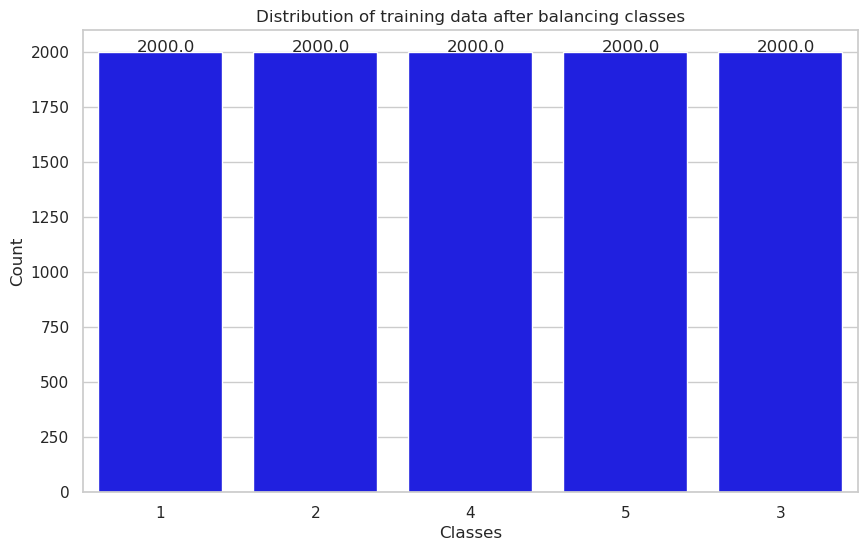

In [52]:
plot_col_value_counts(
    list(train_dic.keys()),list(train_dic.values()),"Classes","Count","Distribution of training data after balancing classes")

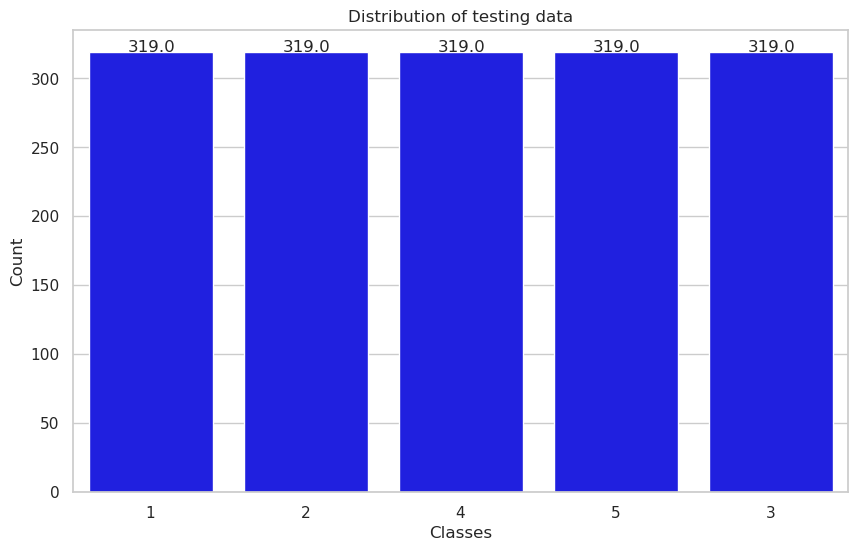

In [53]:
plot_col_value_counts(
    list(test_dic.keys()),list(test_dic.values()),"Classes","Count","Distribution of testing data")

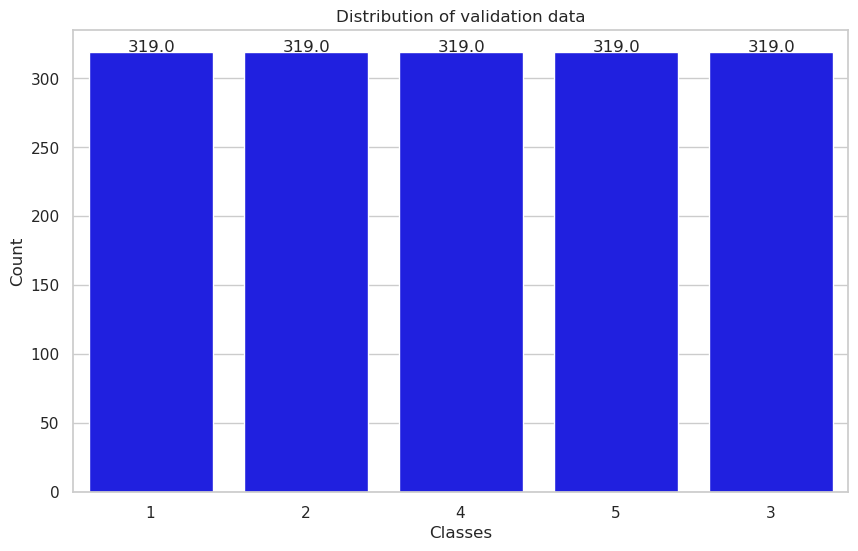

In [54]:
plot_col_value_counts(
    list(valid_dic.keys()),list(valid_dic.values()),"Classes","Count","Distribution of validation data")

<a id='s3'></a>
# Uploading the data to S3 Bucket

In [132]:
%%capture
!aws s3 cp data s3://capstone-project-amazon-bin-images/data/ --recursive

In [135]:
print(f"Data Path: s3://capstone-project-amazon-bin-images/data/")


Data Path: s3://capstone-project-amazon-bin-images/data/
